#### The dataset we will be analyzing today is the vehicular dataset. We will perform the following analysis on the dataset

5. Continue with the same built model in No.4, but choose different
independent variables and discuss the result.

#### Let us begin, shall we

##### Step 1: Prelimenaries

Import the libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Automobile_data.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


1. We will apply data cleaning methods (using python) to solve missing values where all attributes are presented as '?'

In [3]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
df['bore'].replace('?',np.nan,inplace=True)
df['stroke'].replace('?',np.nan,inplace=True)
df['horsepower'].replace('?',np.nan,inplace=True)
df['peak-rpm'].replace('?',np.nan,inplace=True)
df['price'].replace('?',np.nan,inplace=True)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

2. Check the data types of those column with the missing values, and convert the data type if needed

In [5]:
df.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


fill na with mean values

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df=df.apply(lambda x:pd.to_numeric (x, errors='ignore'))
df=df.replace(np.nan,np.mean(df,axis=0))
df

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [8]:
corr_matrix = df.corr()
corr_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_11796\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


3. Find all the correlated features to the ‘Price’

###### Correlation Analysis in Machine Learning

Correlation is a statistical method that is used to understand the relationship between two variables in a dataset. Correlation measures how much change occurs in a variable as a result of other variable. 
The range of correlation is -1 to +1. 
Positive correlation is when the relationship between the two variables is directly proportional, and negative correlation is when the relationship between the two variables are inversely proportional. 

Read about correlation [here](https://www.javatpoint.com/correlation-analysis-in-data-mining)

In [9]:
corr_values = corr_matrix['price'].abs()
corr_values

symboling            0.082201
normalized-losses    0.133999
wheel-base           0.583168
length               0.682986
width                0.728699
height               0.134388
curb-weight          0.820825
engine-size          0.861752
bore                 0.532300
stroke               0.082095
compression-ratio    0.070990
horsepower           0.757917
peak-rpm             0.100854
city-mpg             0.667449
highway-mpg          0.690526
price                1.000000
Name: price, dtype: float64

In [10]:
sorted_corr = corr_values.sort_values(ascending=False)
sorted_corr
print(sorted_corr[1:6])

engine-size    0.861752
curb-weight    0.820825
horsepower     0.757917
width          0.728699
highway-mpg    0.690526
Name: price, dtype: float64


4. Build a predictive model to predict the car price based on using one of the independent correlated variable

In [11]:
data = df[["engine-size","price"]]
data = data.dropna()
data


,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


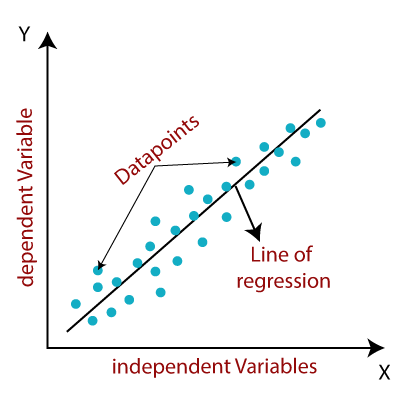

y= a0+a1x+ ε

Y= Dependent Variable (Target Variable)

X= Independent Variable (predictor Variable)

a0= intercept of the line (Gives an additional degree of freedom)

a1 = Linear regression coefficient (scale factor to each input value).

ε = random error

[Linear Regression](https://www.javatpoint.com/linear-regression-in-machine-learning)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[["engine-size"]], data[["price"]], test_size=0.25, random_state=50)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [21]:
#calculate the R-squared score of the model
accuracy= r2_score(y_test,y_pred)

In [22]:
accuracy


0.7699083033372726